In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Death_rates_for_suicide_United_States.csv')

# Inspect the data
print(data.head())
print(data.info())
print(data.describe())
print("\nUnique values in columns:")
print(data.nunique())


                 INDICATOR                                               UNIT  \
0  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
1  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
2  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
3  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
4  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   

   UNIT_NUM STUB_NAME  STUB_NAME_NUM   STUB_LABEL  STUB_LABEL_NUM  YEAR  \
0         1     Total              0  All persons             0.0  1950   
1         1     Total              0  All persons             0.0  1960   
2         1     Total              0  All persons             0.0  1970   
3         1     Total              0  All persons             0.0  1980   
4         1     Total              0  All persons             0.0  1981   

   YEAR_NUM       AGE  AGE_NUM  ESTIMATE  
0         1  All ag

In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Convert YEAR and AGE_NUM to integers for analysis
data['YEAR'] = data['YEAR'].astype(int)
data['AGE_NUM'] = data['AGE_NUM'].astype(int)

# Check if 'Estimate' column exists before filling NaNs
if 'Estimate' in data.columns:
    # Fill numerical columns with zeros
    data['Estimate'].fillna(0, inplace=True)
else:
    # Print a warning or handle the case where 'Estimate' column is missing
    print("Warning: 'Estimate' column not found in the DataFrame.")

# Fill missing values (if any) with 0 or an appropriate strategy
data.fillna(0, inplace=True)

# Filter data for analysis of all persons and all ages
all_persons_all_ages = data[(data['STUB_NAME'] == 'Total') & (data['AGE'] == 'All ages')]


Missing values in each column:
INDICATOR         0
UNIT              0
UNIT_NUM          0
STUB_NAME         0
STUB_NAME_NUM     0
STUB_LABEL        0
STUB_LABEL_NUM    0
YEAR              0
YEAR_NUM          0
AGE               0
AGE_NUM           0
ESTIMATE          0
dtype: int64


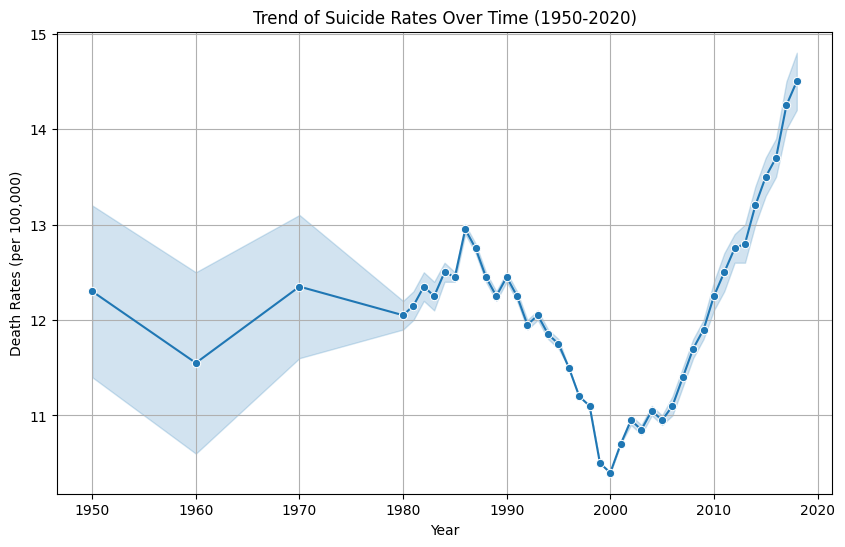

In [ ]:
# Line plot for trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_persons_all_ages, x='YEAR', y='ESTIMATE', marker='o')
plt.title('Trend of Suicide Rates Over Time (1950-2020)')
plt.xlabel('Year')
plt.ylabel('Death Rates (per 100,000)')
plt.grid()
plt.show()

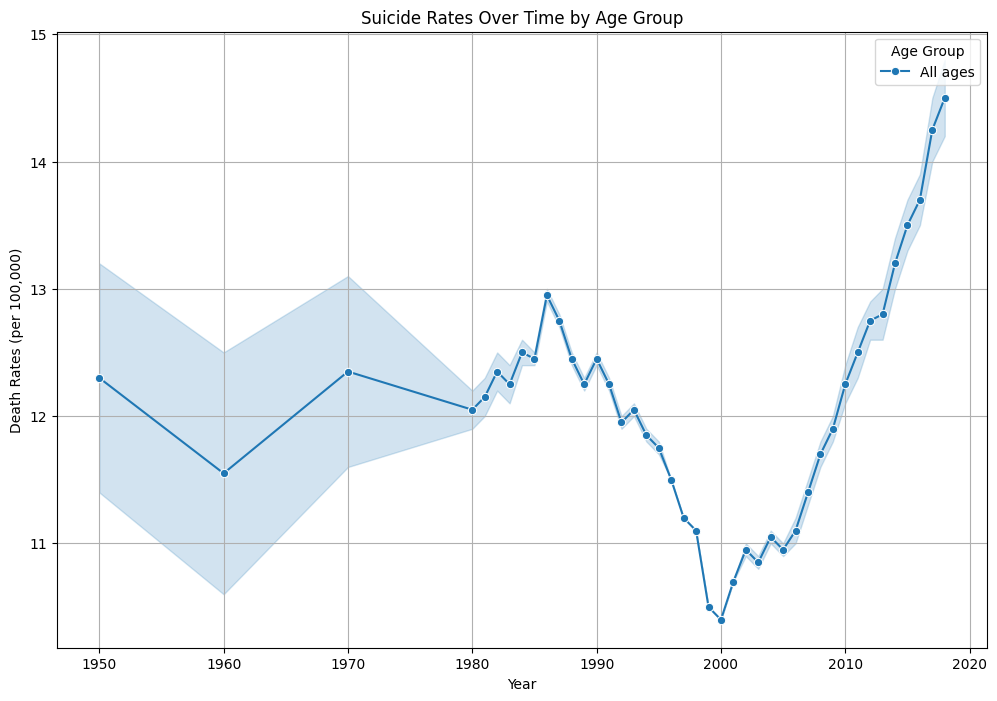

In [ ]:
# Analyze suicide rates by age group
age_group_data = data[data['STUB_NAME'] == 'Total']

plt.figure(figsize=(12, 8))
sns.lineplot(data=age_group_data, x='YEAR', y='ESTIMATE', hue='AGE', marker='o')
plt.title('Suicide Rates Over Time by Age Group')
plt.xlabel('Year')
plt.ylabel('Death Rates (per 100,000)')
plt.legend(title='Age Group')
plt.grid()
plt.show()


Regression Results:
Mean Squared Error: 1.0056348447621783
R-squared: -0.09242395931540215


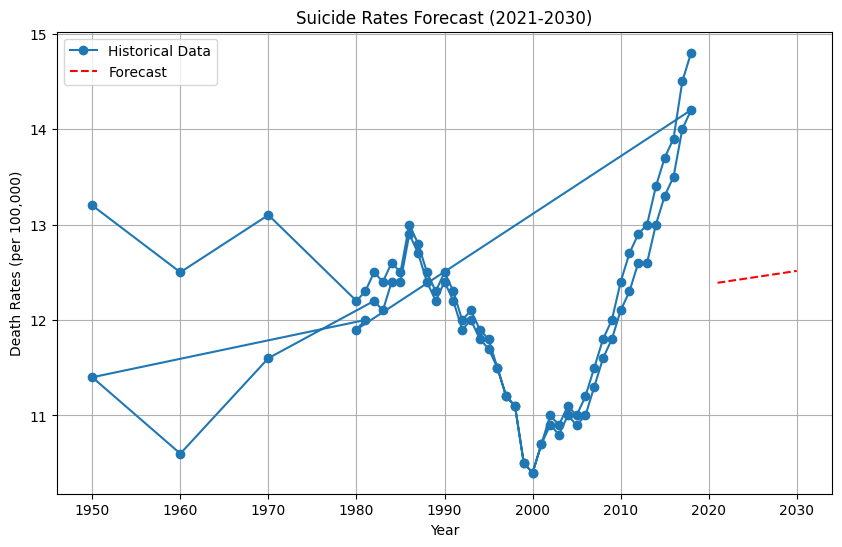

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for regression
X = all_persons_all_ages[['YEAR']]
y = all_persons_all_ages['ESTIMATE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nRegression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Forecast future rates
future_years = pd.DataFrame({'YEAR': range(2021, 2031)})
future_rates = model.predict(future_years)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(all_persons_all_ages['YEAR'], all_persons_all_ages['ESTIMATE'], label='Historical Data', marker='o')
plt.plot(future_years['YEAR'], future_rates, label='Forecast', linestyle='--', color='red')
plt.title('Suicide Rates Forecast (2021-2030)')
plt.xlabel('Year')
plt.ylabel('Death Rates (per 100,000)')
plt.legend()
plt.grid()
plt.show()

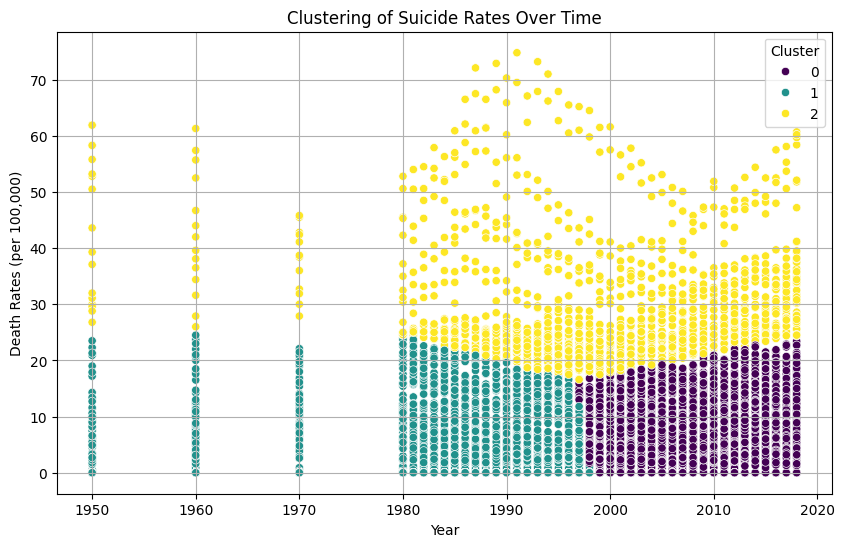

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['YEAR_NUM', 'ESTIMATE']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='YEAR', y='ESTIMATE', hue='Cluster', palette='viridis')
plt.title('Clustering of Suicide Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Death Rates (per 100,000)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

<ipython-input-10-c0c3090c9b18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_persons_all_ages['Yearly_Change'] = all_persons_all_ages['ESTIMATE'].pct_change() * 100
<ipython-input-10-c0c3090c9b18>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=all_persons_all_ages, x='YEAR', y='Yearly_Change', palette='coolwarm')


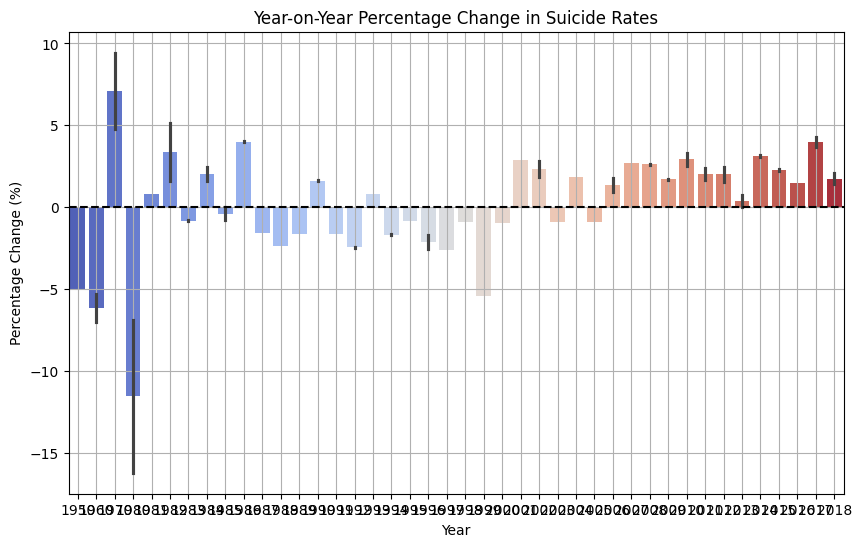

In [ ]:
# Calculate percentage change
all_persons_all_ages['Yearly_Change'] = all_persons_all_ages['ESTIMATE'].pct_change() * 100

# Plot percentage change over time
plt.figure(figsize=(10, 6))
sns.barplot(data=all_persons_all_ages, x='YEAR', y='Yearly_Change', palette='coolwarm')
plt.title('Year-on-Year Percentage Change in Suicide Rates')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.axhline(0, color='black', linestyle='--')
plt.grid()
plt.show()


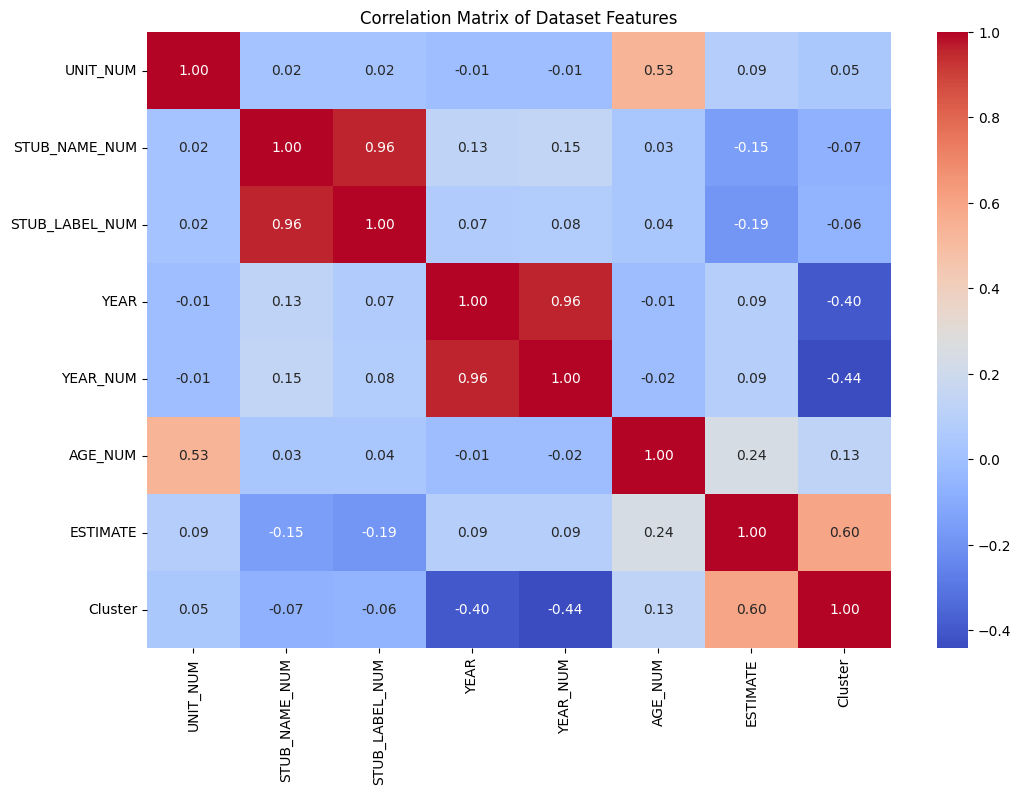

In [ ]:
# Correlation matrix
# Exclude non-numeric columns before calculating correlations
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Dataset Features')
plt.show()

In [ ]:
# Calculate changes for each age group
age_group_changes = data.groupby('AGE')['ESTIMATE'].diff()

# Add change column
data['Rate_Change'] = age_group_changes

# Filter significant changes (e.g., changes greater than 5)
significant_changes = data[abs(data['Rate_Change']) > 5]

print("Significant Changes in Age Groups:")
print(significant_changes[['YEAR', 'AGE', 'ESTIMATE', 'Rate_Change']])


Significant Changes in Age Groups:
      YEAR                AGE  ESTIMATE  Rate_Change
42    1950           All ages      21.2          7.0
84    1950           All ages       5.6        -17.2
126   1950           All ages      22.3         16.1
168   1950           All ages       7.5        -18.0
210   1950           All ages       0.0        -11.6
...    ...                ...       ...          ...
6378  2018        15-24 years       6.7         -9.5
6379  2018        25-44 years      10.4         -5.4
6381  2018  65 years and over       6.3         -8.7
6383  2018        25-44 years       4.5         -5.9
6384  2018        45-64 years       3.1         -9.9

[399 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

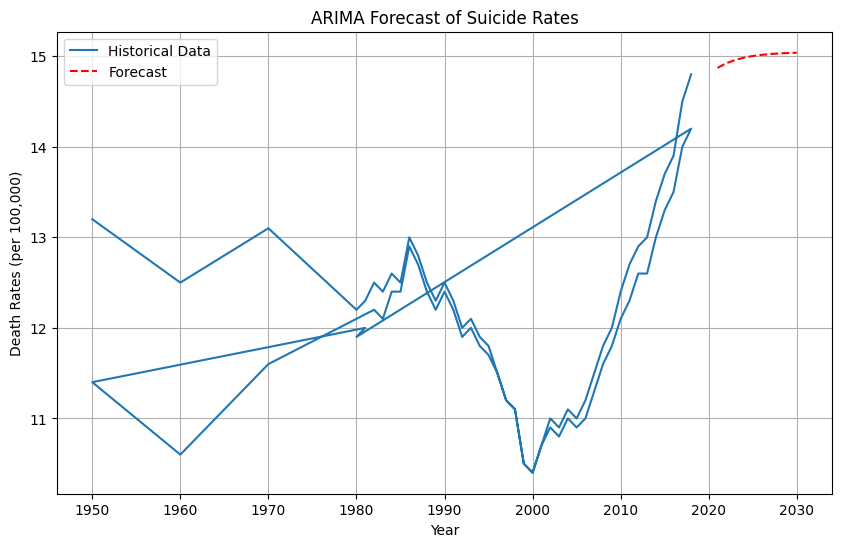

                               SARIMAX Results                                
Dep. Variable:               ESTIMATE   No. Observations:                   84
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -45.385
Date:                Fri, 20 Dec 2024   AIC                             96.770
Time:                        10:58:40   BIC                            104.027
Sample:                             0   HQIC                            99.686
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7093      0.741      0.957      0.339      -0.743       2.162
ma.L1         -0.6344      0.809     -0.784      0.433      -2.220       0.951
sigma2         0.1747      0.017     10.035      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Prepare data for ARIMA
time_series = all_persons_all_ages.set_index('YEAR')['ESTIMATE']

# Fit ARIMA model
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=10)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Historical Data')
plt.plot(range(2021, 2031), forecast, label='Forecast', linestyle='--', color='red')
plt.title('ARIMA Forecast of Suicide Rates')
plt.xlabel('Year')
plt.ylabel('Death Rates (per 100,000)')
plt.legend()
plt.grid()
plt.show()

# Model summary
print(model_fit.summary())


Feature Importance:
          Feature  Importance
3  STUB_LABEL_NUM    0.711430
1         AGE_NUM    0.109383
0        YEAR_NUM    0.100581
2   STUB_NAME_NUM    0.078606


<ipython-input-15-ac7141fbed9b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


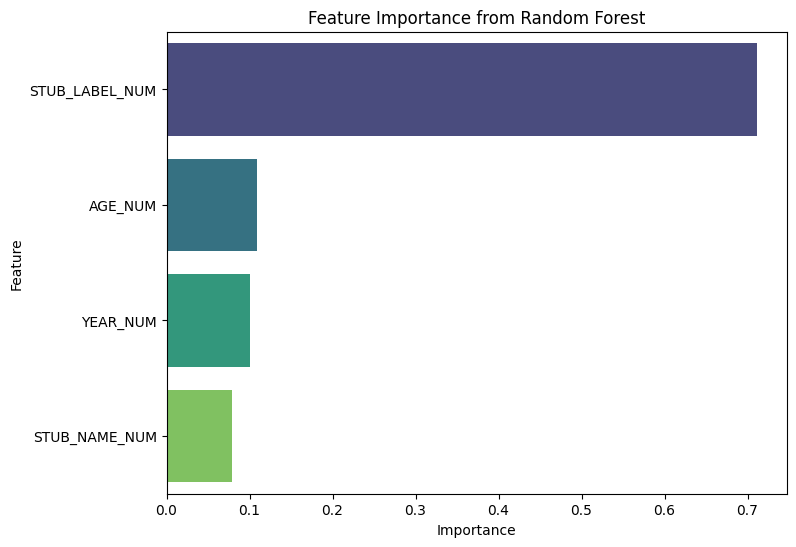

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Prepare feature set and target
features = data[['YEAR_NUM', 'AGE_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM']]
target = data['ESTIMATE']

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(features, target)

# Feature importance
importances = rf_model.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print("Feature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.show()


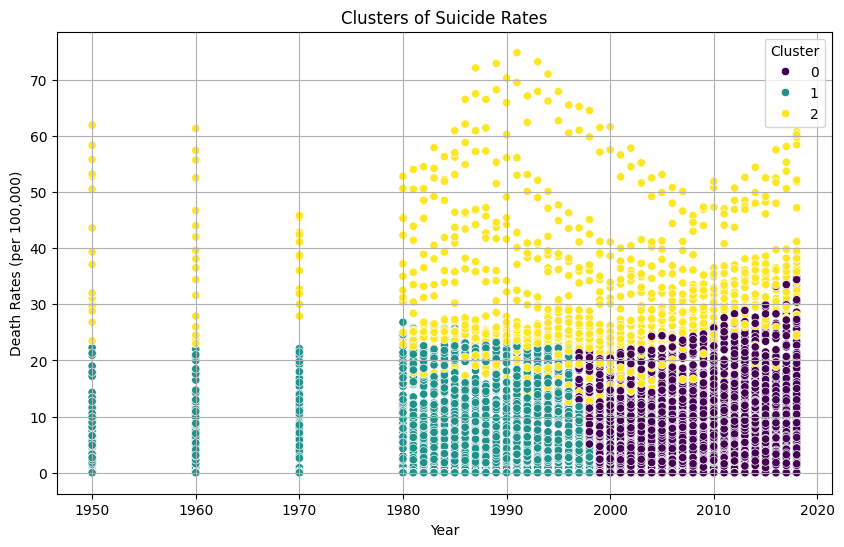

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data for clustering
clustering_data = data[['YEAR_NUM', 'AGE_NUM', 'ESTIMATE']]

# Standardize the data
scaler = StandardScaler()
scaled_clustering_data = scaler.fit_transform(clustering_data)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_clustering_data)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='YEAR', y='ESTIMATE', hue='Cluster', palette='viridis')
plt.title('Clusters of Suicide Rates')
plt.xlabel('Year')
plt.ylabel('Death Rates (per 100,000)')
plt.legend(title='Cluster')
plt.grid()
plt.show()
